# Project Setup and Math Testing

https://en.wikipedia.org/wiki/Orbit_modeling#Keplerian_orbit_model

https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation

## Math

$$F=G\frac{m_1m_2}{r^2}$$
$$m\ddot{r} = G\frac{m_1m_2}{r^2}$$

### n-body $F=ma$

$$F_{ij}=\frac{Gm_im_j(q_j-q_i)}{||q_j-q_i||^3}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def eucDist(origin, vectorizedGrid):
    '''
    Calculate the euclidian distance between a point (origin) and another point(s)
    
    origin: origin points np.array of shape{(n,1)}
        n: spacial dimensions of the model
    vectorizedGrid: vectorized grid {np.array of shape(n,m^n)} ????
        m: grid resolution ????
        
    return an array containing the distance to each point on the grid from the origin
    '''
    dist = np.sqrt(np.sum((origin-vectorizedGrid)**2, axis=0))

    return(dist)

def fofGrav(objIndex, vectObjPos, objMasses):
    '''
    Calculate the acceleration on an object due to n bodies around it
    
    objIndex: index of the object the force is acting on {int}
    vectObjPos: vectorized list of object positions {np.array of shape(n,m)}
        n: spacial dimensions of the model
        m: number of objects
    objMasses: list of object masses {np.array of shape(m)}
    
    return a vector containing the force acting on the object
    '''
    G = 6.67408E-11
    
    mass_WO_Obj = np.delete(objMasses, objIndex) #Mass of the objects not including the origin object
    pos_WO_Obj = np.delete(vectObjPos, objIndex, axis = 1) #Position of the objects not including the origin object
    pos_Obj = vectObjPos[:,objIndex] #Position of the origin object
    pos_Obj = np.reshape(pos_Obj, (len(pos_Obj),1)) #Reshape of a vector

    forceOnObject = np.sum(G * objMasses[objIndex] * mass_WO_Obj * (pos_WO_Obj - pos_Obj) * (1/(eucDist(pos_Obj, pos_WO_Obj))**3), axis=1)
    
    return(forceOnObject, forceOnObject/objMasses[objIndex])
    
def vectorizeGrid(grid): #Used for np.mgrid or a combined np.meshgrid
    '''
    Vectorize and decompose the components of the grid
    
    grid: np.array of shape(n,m...m_n)
        n: spacial dimensions of the model
        m: grid resolution
        
    return an array containing the vectorized components of grid shape(n,m^n) ????
    '''
    dimension = grid.shape[0] #Get n
    resolution = np.prod(grid.shape[1:]) #Get resolution by taking the product of the m values 
    
    vectorizedGrid = np.reshape(grid[:],(dimension,resolution)) #Get first vectorized component

    return(vectorizedGrid)

## Calculate the Force Acting on Each Object

In [3]:
G = 6.67408E-11
mE = 5.972E24 #kg
mS = 1.989E30 #kg
mM = 7.347E22 #kg

posSun = np.array([0,0,0]) #m
posEarth = np.array([149.6E9,0,0]) #m
posMoon = np.array([149.6E9,384.4E6,0]) #m

F = G*mE*mS*(posEarth-posSun)*(1/(eucDist(posSun,posEarth))**3)
F2 = G*mS*mE*(posSun-posEarth)*(1/(eucDist(posEarth,posSun))**3)

print(F)
print(F2)

[3.54227932e+22 0.00000000e+00 0.00000000e+00]
[-3.54227932e+22  0.00000000e+00  0.00000000e+00]


In [4]:
massArray = np.array([[mS,mE,mM]]).T
posArray = np.array([posSun,posEarth,posMoon]).T

print(massArray)
print(posArray)

fofGrav(0,posArray,massArray)

[[1.989e+30]
 [5.972e+24]
 [7.347e+22]]
[[0.000e+00 1.496e+11 1.496e+11]
 [0.000e+00 0.000e+00 3.844e+08]
 [0.000e+00 0.000e+00 0.000e+00]]


(array([3.58585746e+22, 1.11974860e+18, 0.00000000e+00]),
 array([1.80284437e-08, 5.62970639e-13, 0.00000000e+00]))

In [5]:
for i in range(len(posArray)):
    display(fofGrav(i,posArray,massArray)/massArray[i])

array([[1.80284437e-08, 5.62970639e-13, 0.00000000e+00],
       [9.06407428e-39, 2.83042051e-43, 0.00000000e+00]])

array([[-5.93147910e-03,  3.31844550e-05,  0.00000000e+00],
       [-9.93214852e-28,  5.55667365e-30,  0.00000000e+00]])

array([[-5.93142035e-03, -2.71263528e-03,  0.00000000e+00],
       [-8.07325487e-26, -3.69216725e-26,  0.00000000e+00]])

## Grid Creation

### np.meshgrid method 

- Can specify number of grid points

In [6]:
h = np.linspace(-2,2,5) #Grid spacing
x, y, z = np.meshgrid(h,h,h)
test = np.array([y,x,z])

vectorizeGrid(test)

array([[-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
        -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [-2., -2., -2., -2., -2., -1., -1., -1., -1., -1.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2., -2.,
        -2., -2., -2., -2., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2., -2., -2.,
  

### np.mgrid method 

- Can specify spacing between grid points

In [7]:
pointSep = 1 #Seperation between grid points
test = np.mgrid[-2:3:pointSep,-2:3:pointSep,-2:3:pointSep]

vectorizeGrid(test)

array([[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
        -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [-2, -2, -2, -2, -2, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  1,  2,  2,  2,  2,  2, -2, -2, -2, -2, -2, -1, -1,
        -1, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1,  0,  0,  0,  0,
         0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2, -2, -2, -2, -2, -2,
        -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,
   

### Grid visualization for testing

Text(0.5, 0, 'z')

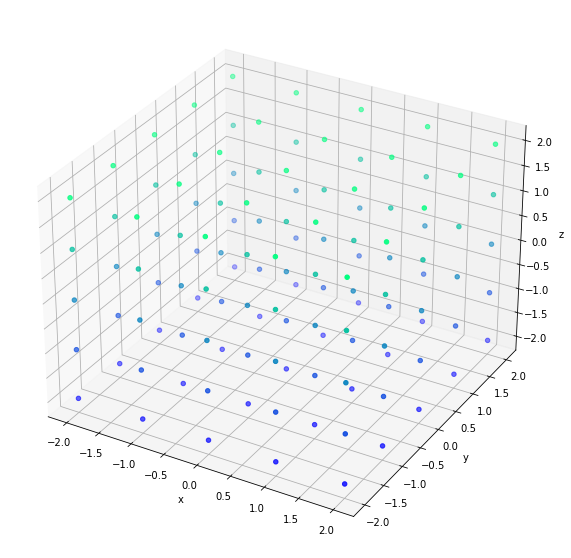

In [8]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(test[1],test[2],test[0], c = test[0], cmap = 'winter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Radius Calculation

In [9]:
h = np.linspace(-2,2,5) #Grid spacing
x, y, z = np.meshgrid(h,h,h)
test = np.array([y,x,z])

vecTest = vectorizeGrid(test)

print(vecTest.shape)

display(eucDist(np.array([[1],[1],[1]]),vecTest))

(3, 125)


array([5.19615242, 4.69041576, 4.35889894, 4.24264069, 4.35889894,
       4.69041576, 4.12310563, 3.74165739, 3.60555128, 3.74165739,
       4.35889894, 3.74165739, 3.31662479, 3.16227766, 3.31662479,
       4.24264069, 3.60555128, 3.16227766, 3.        , 3.16227766,
       4.35889894, 3.74165739, 3.31662479, 3.16227766, 3.31662479,
       4.69041576, 4.12310563, 3.74165739, 3.60555128, 3.74165739,
       4.12310563, 3.46410162, 3.        , 2.82842712, 3.        ,
       3.74165739, 3.        , 2.44948974, 2.23606798, 2.44948974,
       3.60555128, 2.82842712, 2.23606798, 2.        , 2.23606798,
       3.74165739, 3.        , 2.44948974, 2.23606798, 2.44948974,
       4.35889894, 3.74165739, 3.31662479, 3.16227766, 3.31662479,
       3.74165739, 3.        , 2.44948974, 2.23606798, 2.44948974,
       3.31662479, 2.44948974, 1.73205081, 1.41421356, 1.73205081,
       3.16227766, 2.23606798, 1.41421356, 1.        , 1.41421356,
       3.31662479, 2.44948974, 1.73205081, 1.41421356, 1.73205

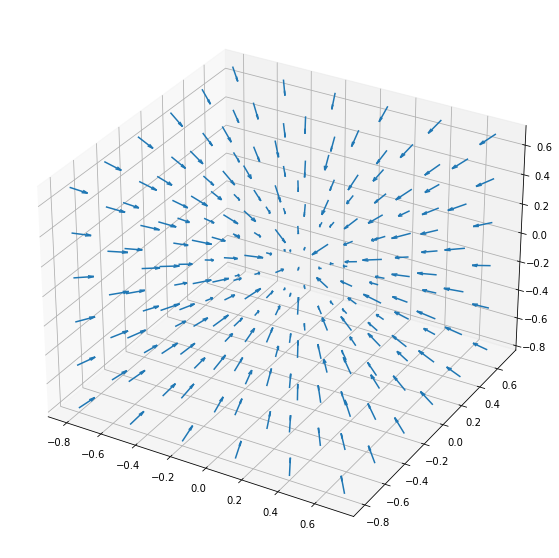

In [10]:
G = 6.67430E-11

def gR(grid):
    return (-2*y, x)
 
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.3),
                      np.arange(-0.8, 1, 0.3),
                      np.arange(-0.8, 1, 0.3))
U = x*-0.1
V = y*-0.1
W = z*-0.1

ax = plt.figure(figsize = (10,10)).add_subplot(projection='3d')
ax.quiver(x,y,z,U,V,W, length = 0.1, normalize = True)

Text(0.5, 0, 'z')

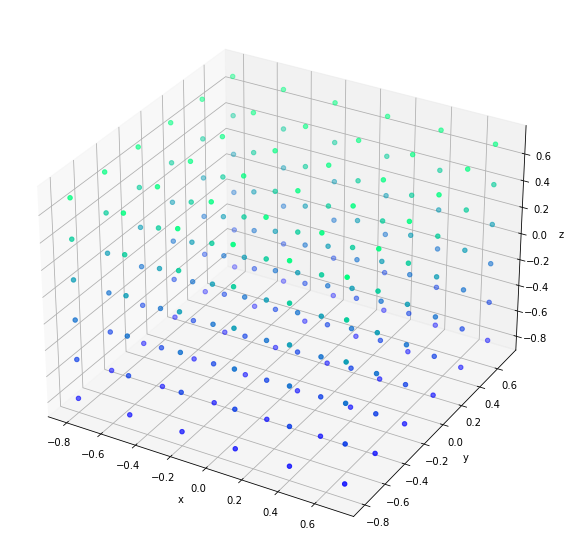

In [11]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z, c = z, cmap = 'winter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Euler and Huen Loops:

Methods for updating velocity, acceleration, and position. 

- h = step size
- a = accelration
- v = velocity
- r = position
- G = gravitional constant
- m1 = object experiencing accelration
- t = time interval

# Euler 

for i in range(0,len(t)-1):
    v[i+1] = v[i] + h * a[i]
    r[i+1] = r[i] + h * v[i]
    a[i+1] = Gm1/((r[i+1])**2)
    
# Huen 
for i in range(0,len(t)-1):
    v[i+1] = v[i] + h * a[i]
    r[i+1] = r[i] + (h/2)(v[i] + v[i+1])
    a[i+1] = Gm1/((r[i+1])**2)

In [78]:
# position
posSun = np.array([0,0,0]) #m
posEarth = np.array([7.251E7,1.181E8,5.119E7])*1000 #m

posArray = np.array([posSun,posEarth]).T

# velocity
vSun = np.array([0,0,0]) #m/s
vEarth = np.array([-2.6E4,1.3E4,5.76E3]) 

vArray = np.array([vSun,vEarth]).T

print(posArray)
#acceleration 
accArray = fofGrav(1,posArray, massArray)
accArray[1]

# mass
mE = 5.972E24 #kg
mS = 1.989E30 #kg

massArray = np.array([[mS,mE]]).T

[[0.000e+00 7.251e+10]
 [0.000e+00 1.181e+11]
 [0.000e+00 5.119e+10]]


In [79]:
iterTime = 500
t = np.arange(0,iterTime,1)

v = np.zeros((iterTime,3,2))
r = np.zeros((iterTime,3,2))
a = np.zeros((iterTime,3,2))

v[0] = vArray
r[0] = posArray
a[0,0][1] = accArray[1][0]

In [80]:
h = 84000
update = 0
for i in range(0,len(t)-1):
    v[i+1] = v[i] + h * a[i]
    r[i+1] = r[i] + h * v[i]
    update = np.hstack((np.array([[0],[0],[0]]),np.array([fofGrav(1,r[i],massArray)[1]]).T))
    a[i+1] = update

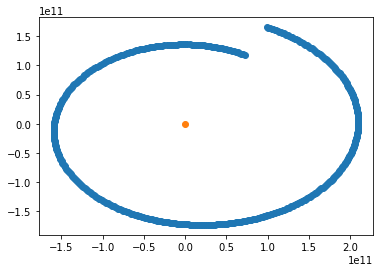

In [82]:
plt.axis('on')

plt.scatter(r[:,0,1],r[:,1,1])
    
plt.scatter(r[0,0,0],r[0,1,0])

In [98]:
print(np.reshape(r[0,:,1],(3,1)))
rEarth = eucDist(np.array([[0],[0],[0]]), np.reshape(r[0,:,1],(3,1)))
print(rEarth)

[[7.251e+10]
 [1.181e+11]
 [5.119e+10]]
[1.47735325e+11]


Text(0.5, 0.874, 'Testing')

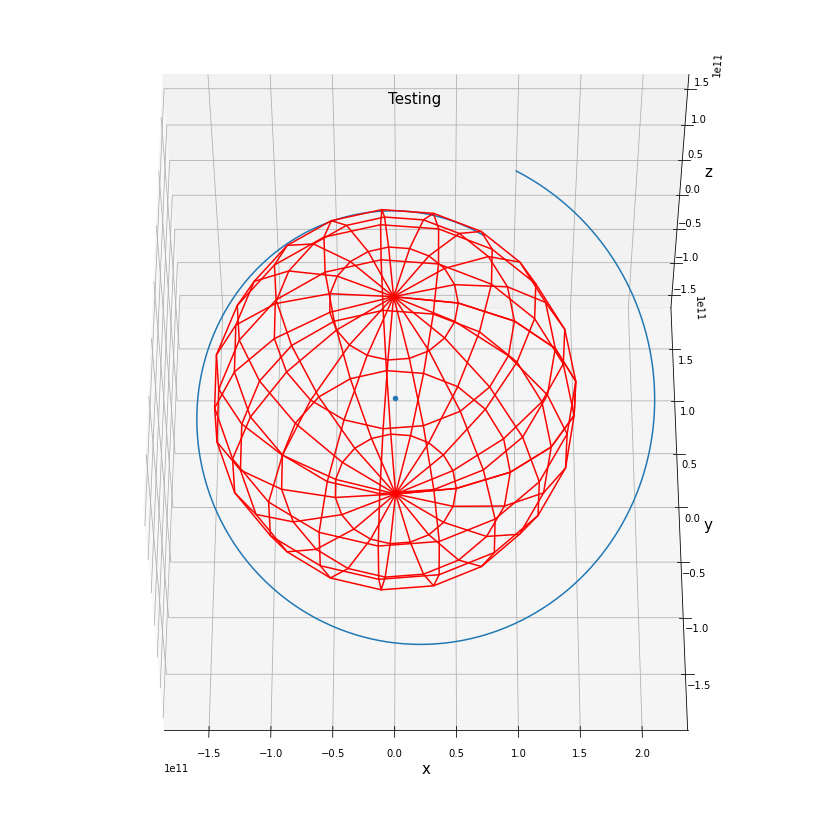

In [104]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

# plot orbit
xPlot = r[:,0,1]
yPlot = r[:,1,1]
zPlot = r[:,2,1]

ax.plot(xPlot, yPlot, zPlot)

# plot spherical wireframe (of the radius of the orbit)
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
rEarth = eucDist(np.array([[0],[0],[0]]), np.reshape(r[0,:,1],(3,1)))

x = rEarth*np.cos(u)*np.sin(v)
y = rEarth*np.sin(u)*np.sin(v)
z = rEarth*np.cos(v)

ax.plot_wireframe(x, y, z, color="r")

# plot the position of the sun
xPlot = r[0,0,0]
yPlot = r[0,1,0]
zPlot = r[0,2,0]

ax.scatter(xPlot, yPlot, zPlot)

ax.view_init(elev=55, azim=-90) #Change view parameters (spin along the azimuth)

ax.set_xlabel('x', fontsize = 15) #Assign label
ax.set_ylabel('y', fontsize = 15) #Assign label
ax.set_zlabel('z', fontsize = 15) #Assign label

ax.set_title('Testing', y=0.95, fontsize=15)
